<a href="https://colab.research.google.com/github/Runshi-Yang/JSC270_HW2_2022_RunshiYang/blob/main/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSC270 Assigment 2

###Libraries you'll likely need

In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [473]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

##PART II - DATA Analysis 

### Initial data exploration

#### 1. Check the columns of your data

In [474]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week are described as continuous in [this text file description of the data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names), they are expected to be of type float64 instead of int64. All of the other columns are the expected data types based on their descriptions. 

####2. Missing values

In [475]:
income94.age.value_counts() # use value_counts() to identify special characters in numeric variables

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [476]:
income94.workclass.value_counts() # Notice that " ?" is representing the missing value in this column.

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [477]:
income94.fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [478]:
income94.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [479]:
income94.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [480]:
income94.occupation.value_counts() # Notice that " ?" is representing the missing value in this column.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [481]:
income94.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [482]:
income94.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [483]:
income94.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [484]:
income94.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [485]:
income94.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [486]:
income94.hours_per_week.value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64

In [487]:
income94.native_country.value_counts() # Notice that " ?" is representing the missing value in this column.

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [488]:
income94.gross_income_group.value_counts()

 <=50K    24720
 >50K      7841
Name: gross_income_group, dtype: int64

In [489]:
income94 = income94.replace(' ?', np.NaN) # Cast missing values to np.NaN

In [490]:
income94.isnull().sum() # Check that all missing values are casted to np.NaN

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

There are 1836 missing values in column 'workclass', 1843 missing values in column 'occupation', 583 missing values in column 'native_country'. Other columns do not have missing values.

####3. Plot the distributions

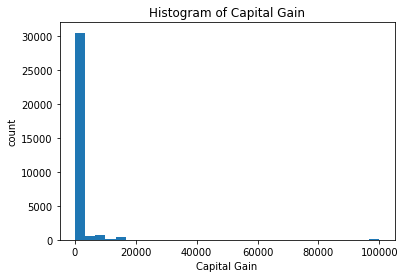

In [491]:
plt.hist(income94.capital_gain, bins = 30)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('count')
plt.show()

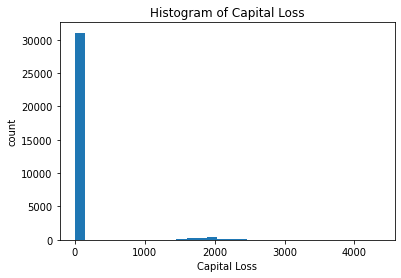

In [492]:
plt.hist(income94.capital_loss, bins = 30)
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('count')
plt.show()

I think these variables should be transformed to categorical variables, since most of (more than 90%) of the capital gain or capital loss are 0, it is reasonable to group them into one group and let the others in one group. I will create two columns named 'zero_gain' and 'zero_loss' with boolean values 'True' or 'False' in the following:

In [493]:
# Divide observations into 2 types based on their 'capital_gain' values.
gain_types = [income94['capital_gain'] == 0, income94['capital_gain'] != 0]
# Divide observations into 2 types based on their 'capital_loss' values.
loss_types = [income94['capital_loss'] == 0, income94['capital_loss'] != 0]
type_values = ['true', 'false']
income94['zero_gain'] = np.select(gain_types, type_values)
income94['zero_loss'] = np.select(loss_types, type_values)


Plot the distribution of the new categorical variables:

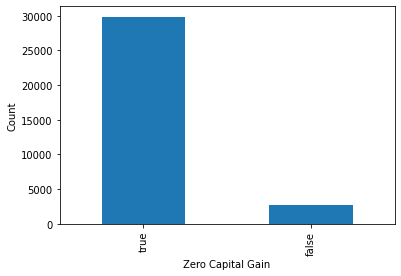

In [494]:
income94['zero_gain'].value_counts().plot(kind = 'bar')
plt.xlabel('Zero Capital Gain')
plt.ylabel('Count')
plt.show()

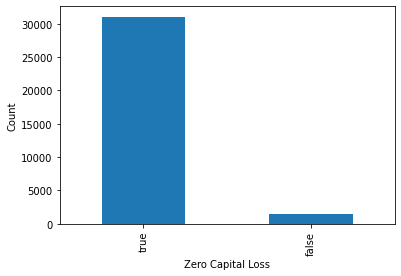

In [495]:
income94['zero_loss'].value_counts().plot(kind = 'bar')
plt.xlabel('Zero Capital Loss')
plt.ylabel('Count')
plt.show()

####4. Distribution of *fnlwgt*

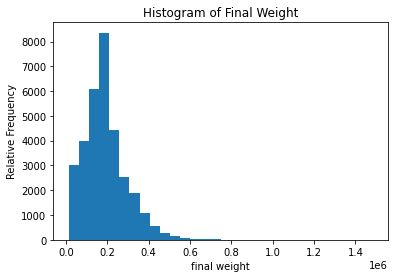

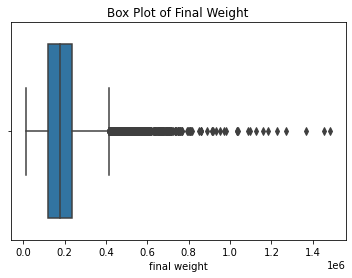

In [496]:
plt.hist(income94.fnlwgt, bins = 30)
plt.title('Histogram of Final Weight')
plt.xlabel('final weight')
plt.ylabel('Relative Frequency')
plt.show()
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('final weight')
plt.title('Box Plot of Final Weight')
plt.show()

The variable *fnlwgt* is not symmetrically distributed, but positively skewed.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fa2cbdd90>,
      dtype=object)

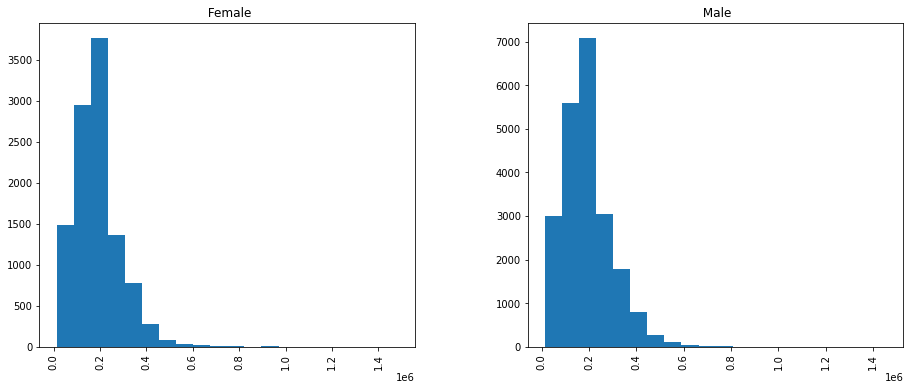

In [497]:
income94.hist(column = 'fnlwgt', by = "sex", figsize = (15,6), bins = 20)

The distribution of this variable between men and women are very similar, both of them are positively skewed, and the modes are all at around $0.2\times 10^6$. But there are twice as many male as female with the same final weight.

In [498]:
  # Capture 1st and 3rd quartiles
  firstquart = income94['fnlwgt'].quantile(q=0.25)
  thirdquart = income94['fnlwgt'].quantile(q=0.75)

  # Generate IQR
  iqr = thirdquart - firstquart

  # Generate the boundary for an outlier (ie. the whiskers of the plot)
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr

  # Gen outlier income94
  outliers = income94[(income94['fnlwgt'] > upper_whisker) | (income94['fnlwgt'] < lower_whisker)]

In [499]:
outliers.count

<bound method DataFrame.count of        age          workclass  fnlwgt  ... gross_income_group  zero_gain zero_loss
37      19            Private  544091  ...              <=50K       true      true
40      31            Private  507875  ...              <=50K       true      true
80      18            Private  446839  ...              <=50K       true      true
110     24            Private  432376  ...              <=50K       true      true
157     71   Self-emp-not-inc  494223  ...              <=50K       true     false
...    ...                ...     ...  ...                ...        ...       ...
32306   24            Private  427686  ...              <=50K       true      true
32329   28            Private  435842  ...              <=50K       true      true
32470   50            Private  485710  ...              <=50K       true      true
32496   18            Private  436163  ...              <=50K       true      true
32511   25          Local-gov  514716  ...            

In [500]:
# Change the value of each outlier to np.NaN
for i in outliers.index:
  income94.loc[i, 'fnlwgt'] = np.NaN

The outliers should be excluded, since there are 992 out of 32561 outiers, removing them will not affect the number of observasions greatly and will increase the accuracy of the models building on this dataset.

### Correlation

####1. Find the correlations between age, education_num, and hours_per_week. 

a.  Do any of the variables appear to be correlated? How did you make your assessment?

In [501]:
income94[['age', 'education_num', 'hours_per_week']].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


education_num and hours_per_week appear to be correlated. I made my assessment since their correlation coefficient is much larger than 0.

b. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

In [502]:
# Pearson correlation test
stat, p = stats.pearsonr(income94['education_num'], income94['hours_per_week'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.148, p=0.000


The correlation between education_num and age is 0.148 and its significance is 0, which indicates strong evidence against the null hypothesis. The direction and significance of my finding are as expected since people with more education will find jobs more easily.

c. How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?


In [503]:
male_income = income94.loc[income94['sex'] == ' Male']
# Pearson correlation test
stat, p = stats.pearsonr(male_income['education_num'], male_income['age'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.060, p=0.000


In [504]:
female_income = income94.loc[income94['sex'] == ' Female']
# Pearson correlation test
stat, p = stats.pearsonr(female_income['education_num'], female_income['age'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-0.018, p=0.063


The correlation is 0.06 (and its significance is 0) between education_num and age for male and he correlation is -0.018 (and its significance is 0.063) between education_num and age for female. This is as expected since the older men are, the earlier they are educated and the more education they receive. And because of the prevalence of gender equality, women living in the 21st century have become more educated, so younger women receive more education.

d. Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

In [505]:
income94[['education_num', 'hours_per_week']].cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


The covariance between education_num and hours_per_week is 4.7. So the education_num and hours_per_week tend to show similar behavior (greater values of one variable mainly correspond with the greater values of the other variable).

### Regression

1. Fit a linear regression with *hours_per_week* as the dependent variable and *sex* as the independent variable.

In [506]:
reg = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:25:58   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

a. Do men tend to work more hours?

Yes, since $β_1 = 6.0117$ indicates that men works 6.0117 hours more than women on average.

b. Add *education_num* as a control variable, does the trend in hours worked by men vs women remain the same? Is the coefficient for *education_num* statistically significant? What is the 95% confidence interval?


In [507]:
reg = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:25:59   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

 The trend in hours worked by men vs women remain the same and the coefficient for education_num is statistically significant. The 95% confidence interval is [5.697, 6.245] for sex and [0.647, 0.748] for education_num.

c. Now add *gross_income_group* as a binary variable in the model and compare this model with the models including (i) only *sex* and (ii) *sex* and *education_num*.  Write down the interpretation for the coefficient for sex in each model.  What statistic(s) can help to decide which model is the “best”?  How do the three models compare?

In [508]:
reg = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:26:00   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

(i) The coefficient for sex is the estimated expected difference in number of working hours per week compare male with female (positive value indicates that male work for more hours).

(ii) The coefficient for sex is the estimated expected difference in number of working hours per week compare male with female holding education_num constant. (positive value indicates that male work for more hours).

(iii) The coefficient for sex is the estimated expected difference in number of working hours per week compare male with female holding education_num and gross_income_group constant. (positive value indicates that male work for more hours).

Statistics R-squared and adjusted R-squared can help to decide which model is the “best”. The R-squared and adjusted R-squared for model 1 (0.053) is less than that of model 2 (0.074) and less than that of model 3 (0.094), so (iii) fits the data better than (ii) better than (i).

##PART III - Reporting on your own regression analysis

My question: whether black people and white people of the same age and gender had equal access to educational resources at that time?

In [509]:
# Filter out the observations of black or white people
black_whiht_df = income94.loc[(income94['race']==' Black') | (income94['race']==' White')]
black_whiht_df.shape

(30940, 17)

In [510]:
reg = smf.ols('education_num ~ race + age', data = black_whiht_df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.51e-49
Time:                        11:26:00   Log-Likelihood:                -72771.
No. Observations:               30940   AIC:                         1.455e+05
Df Residuals:                   30937   BIC:                         1.456e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.2257      0.061    152.